## Lengthscale calculation: Stable 05 m/s 
## Code: `AMR-Wind`
## Mesh: 2.5x2.5x2.5m

### Computing turbulent lengthscales

The two point correlation $R_{ij}$ is defined as
$$ R_{ij}({\mathbf x},\boldsymbol{\xi}) = 
\frac{\langle {u'_i(\mathbf{x}, t) u'_j(\mathbf{x}+\boldsymbol{\xi},t)} \rangle}
{ \sqrt{\langle u'^2_i \rangle} \sqrt{\langle u'^2_j \rangle}} $$

The fluctuations
$$ u'_i(\mathbf{x},t) = u_i(\mathbf{x},t) - \langle u_i(\mathbf{x},t) \rangle $$

The lengthscale is calculated as
$$ L = \int_0^\infty R_{ij}(\xi)\: {\textrm d}\xi  $$

See https://spiral.imperial.ac.uk/bitstream/10044/1/41599/4/Airflow_v16a_Revised25_final_deposit.pdf as a reference

In [1]:
%%capture
# Important header information
naluhelperdir = '../../../../Postprocessing/utilities/'
import sys
# Change some display properties
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
import matplotlib.pyplot as plt
import numpy as np
sys.path.insert(1, naluhelperdir)
import correlate as corr
from matplotlib.lines import Line2D
%matplotlib inline

In [10]:
# Set the parameters
prefix='stable05'
basedir='post_processing_dx2.5/'
ncfile='sampling60000.nc'
#filebase='HHplane_%07i_0.dat'

#iters=np.arange(0,100,1)
#iters=np.arange(0,2501,10)
iters=np.arange(0,2501,5)

#iters=np.arange(40000,41000, 10)   # N=100
#iters=np.arange(30001,40001, 100) # N=100
#iters=np.arange(40000,50000, 20)  # 500
#iters=np.arange(30001,40001, 10) # 1000

loadfromplanes = False  # If True, calculate the average from individual plane files.  If False, load from avgsavefile
plotprobept    = True   # If True, plot the probe locations
iplane = 0
ij   = [0,0]

avgsavefile     = prefix+'_avgplane_%i_%i_%i.dat'%(iters[0],iters[-1],len(iters))
Rijsavefile     = prefix+'_avgRij_%i_%i_%i_iplane_%i.dat'%(iters[0],iters[-1],len(iters),iplane)

In [3]:
# Construct the file list
#filelist=[basedir+'/'+filebase%i for i in iters]
ncfilename=basedir+'/'+ncfile

In [4]:
# Load the average (compute if needed)
avgdat, headers       = corr.loadavg(ncfilename, loadfromplanes, avgsavefile, nctindices=iters, verbose=True)
ws, winddir           = corr.getavgwind(avgdat, headers, iplane)
print('WS   = '+repr(ws))
print('Wdir = '+repr(winddir))
if loadfromplanes: loadfromplanes = False # Don't need to compute any more after this

WS   = [3.5355914396824386, 3.5353765855123531, 7.6183122788158844e-07]
Wdir = 225.00174095500205


In [5]:
# Create the probe list for LONGITUDINAL
# Set parameters
winddir= 225
if (winddir>270): s=-1
else:             s=+1
startx = np.arange(0,300,25)
starty = np.arange(0,300,25)[::s]
probelength = 400 # Probe length should be a few hundred meters
startp = []
yoffset=0
[[startp.append([x,y+yoffset*iy,iplane]) for x in startx] for iy, y in enumerate(starty)]

plistLONG = corr.makeprobeline(startp, winddir, probelength, avgdat)

Nlong      = len(plistLONG)
print("Len(plist)=%i"%Nlong)

Len(plist)=144


In [6]:
# Create the probe list for LATERAL
# Set parameters
winddir= 315
if (winddir>270): s=-1
else:             s=+1
startx = np.arange(0,300,25)
starty = np.arange(0,300,25)[::s]
probelength = 400 # Probe length should may be 0.5*domain length
startp = []
yoffset=0
[[startp.append([x,y+yoffset*iy,iplane]) for x in startx] for iy, y in enumerate(starty)]

plistLAT = corr.makeprobeline(startp, winddir, probelength, avgdat)

Nlat     = len(plistLAT)
print("Len(plist)=%i"%Nlat)

Len(plist)=144


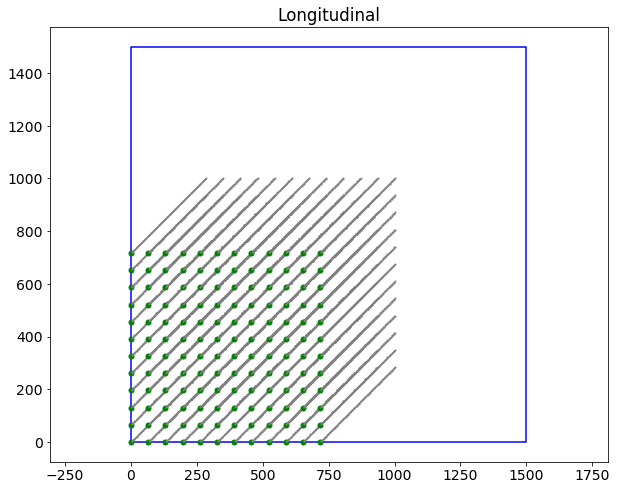

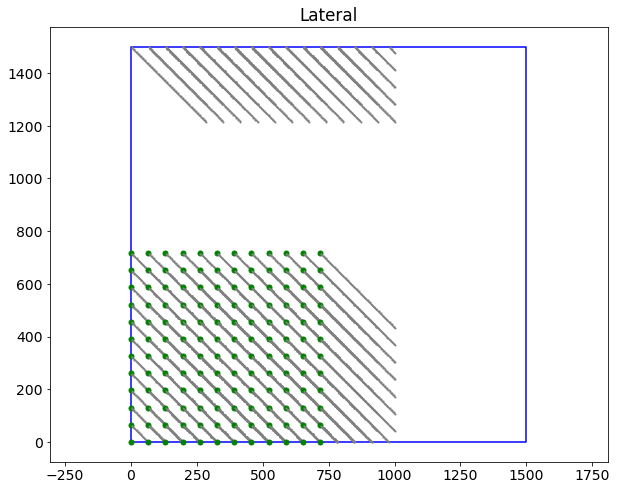

In [7]:
# Plot the probe points
if plotprobept:
    avgdat, headers       = corr.loadavg(ncfilename, loadfromplanes, avgsavefile, verbose=True)
    # LONG
    plt.figure(figsize=(10,8))
    plt.rc('font', size=14)
    corr.plotprobes(plistLONG, avgdat, headers, verbose=False, skip=1)
    plt.title('Longitudinal')
    plt.axis('equal')
    # LAT
    plt.figure(figsize=(10,8))
    plt.rc('font', size=14)
    corr.plotprobes(plistLAT, avgdat, headers, verbose=False, skip=1)
    plt.title('Lateral')
    plt.axis('equal')

In [11]:
plist        = plistLONG + plistLAT
allf, allRij = corr.makeRij(ij, plist, iters, loadfromplanes, avgsavefile, ncfilename=ncfilename, verbose=True)

Computing [1/501]
Computing [2/501]
Computing [3/501]
Computing [4/501]
Computing [5/501]
Computing [6/501]
Computing [7/501]
Computing [8/501]
Computing [9/501]
Computing [10/501]
Computing [11/501]
Computing [12/501]
Computing [13/501]
Computing [14/501]
Computing [15/501]
Computing [16/501]
Computing [17/501]
Computing [18/501]
Computing [19/501]
Computing [20/501]
Computing [21/501]
Computing [22/501]
Computing [23/501]
Computing [24/501]
Computing [25/501]
Computing [26/501]
Computing [27/501]
Computing [28/501]
Computing [29/501]
Computing [30/501]
Computing [31/501]
Computing [32/501]
Computing [33/501]
Computing [34/501]
Computing [35/501]
Computing [36/501]
Computing [37/501]
Computing [38/501]
Computing [39/501]
Computing [40/501]
Computing [41/501]
Computing [42/501]
Computing [43/501]
Computing [44/501]
Computing [45/501]
Computing [46/501]
Computing [47/501]
Computing [48/501]
Computing [49/501]
Computing [50/501]
Computing [51/501]
Computing [52/501]
Computing [53/501]
Co

In [12]:
# Split it back into LONG/LAT
avgRijLong   = np.mean(allRij[:Nlong], axis=0)
avgRijLat    = np.mean(allRij[Nlong:], axis=0)

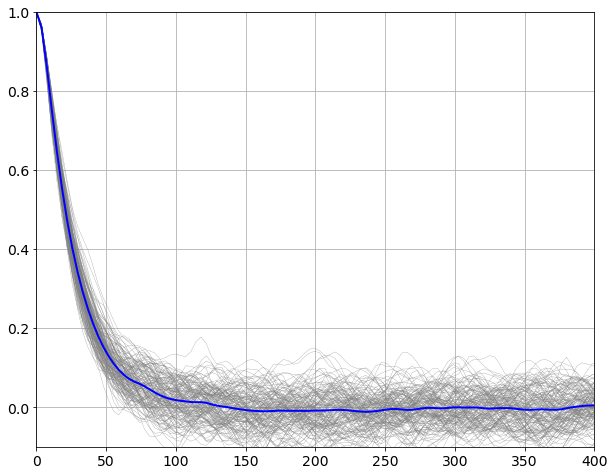

In [13]:
# Plot the LONG Rij
plt.figure(figsize=(10,8))
plt.rc('font', size=14)

for ir, Rij in  enumerate(allRij[:Nlong]):
    plt.plot(allf[Nlong], Rij, 'gray', lw=0.25)
# Average
plt.plot(allf[Nlong], avgRijLong, 'b', lw=2)
plt.ylim([-0.1, 1])
plt.xlim([0, probelength])
plt.grid()

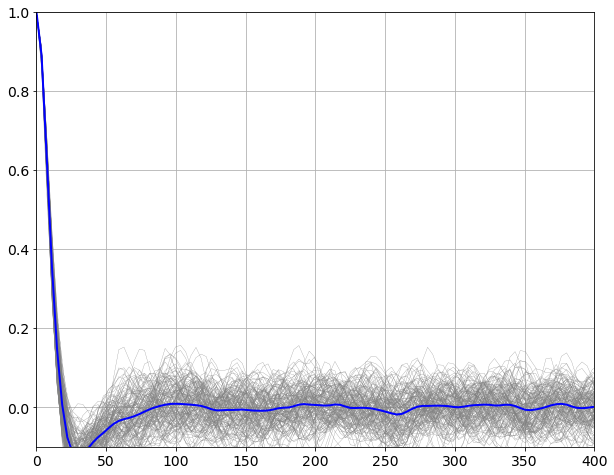

In [14]:
# Plot the LAT Rij
plt.figure(figsize=(10,8))
plt.rc('font', size=14)

for ir, Rij in  enumerate(allRij[Nlong:]):
    plt.plot(allf[Nlong], Rij, 'gray', lw=0.25)
# Average
plt.plot(allf[Nlong], avgRijLat, 'b', lw=2)
plt.ylim([-0.1, 1])
plt.xlim([0, probelength])
plt.grid()

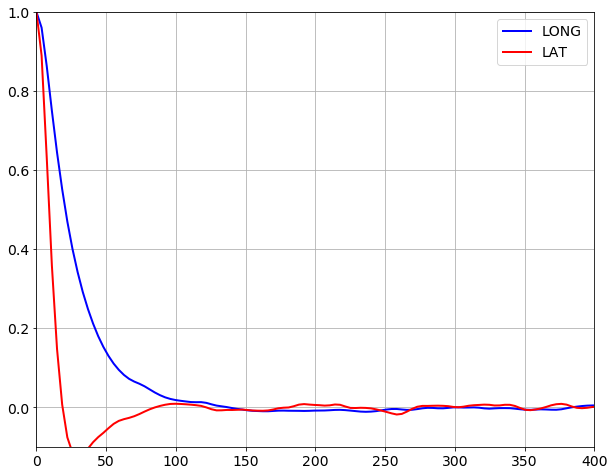

In [15]:
# Plot the LONG+LAT Rij
plt.figure(figsize=(10,8))
plt.rc('font', size=14)

# Average
plt.plot(allf[0], avgRijLong, 'b', lw=2, label='LONG')
plt.plot(allf[Nlong], avgRijLat,  'r', lw=2, label='LAT')
plt.ylim([-0.1, 1])
plt.xlim([0, probelength])
plt.grid()
plt.legend()

In [16]:
# Calculate lengthscale
lengthscale = corr.calclengthscale(allf[0], avgRijLong)
print('LONG lengthscale = %f'%lengthscale)
lengthscale = corr.calclengthscale(allf[Nlong], avgRijLat)
print('LAT lengthscale  = %f'%lengthscale)

LONG lengthscale = 27.689340
LAT lengthscale  = 9.332672


In [18]:
# Save the information
savedat=np.vstack((allf[0], avgRijLong, allf[Nlong], avgRijLat)).transpose()
np.savetxt(Rijsavefile,savedat,header="Xi, RijLong, Xi, RijLat")